# Trump Analysis
This notebook is an analysis of the Trump Legacy dataset, which includes some sentiment analysis information as well.

In [77]:
# %pip install -U textblob

In [114]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from textblob import TextBlob
from wordcloud import WordCloud

In [79]:
trump = pd.read_csv('trump_legacy/Trumps Legcy.csv')
trump['date'] = pd.to_datetime(trump['date'])
trump = trump.sort_values('date')
trump.head(10)

,id,text,device,favorites,retweets,date
13325,1698308935,Be sure to tune in and watch Donald Trump on L...,Twitter Web Client,939,519,2009-05-04 18:54:00
13324,1701461182,Donald Trump will be appearing on The View tom...,Twitter Web Client,259,34,2009-05-05 01:00:00
13323,1737479987,Donald Trump reads Top Ten Financial Tips on L...,Twitter Web Client,37,15,2009-05-08 13:38:00
13322,1741160716,New Blog Post: Celebrity Apprentice Finale and...,Twitter Web Client,29,11,2009-05-08 20:40:00
13321,1773561338,"""""""My persona will never be that of a wallflow...",Twitter Web Client,1877,1321,2009-05-12 14:07:00
13320,1776419923,"""Miss USA Tara Conner will not be fired - """"I'...",Twitter Web Client,25,26,2009-05-12 19:21:00
13319,1786560616,Listen to an interview with Donald Trump discu...,Twitter Web Client,17,16,2009-05-13 17:38:00
13318,1796477499,"""""""Strive for wholeness and keep your sense of...",Twitter Web Client,26,17,2009-05-14 16:30:00
13317,1806258917,"""Enter the """"Think Like A Champion"""" signed bo...",Twitter Web Client,33,18,2009-05-15 14:13:00
13316,1820624395,"""""""When the achiever achieves, it's not a plat...",Twitter Web Client,46,19,2009-05-16 22:22:00


<Axes: xlabel='date', ylabel='count'>

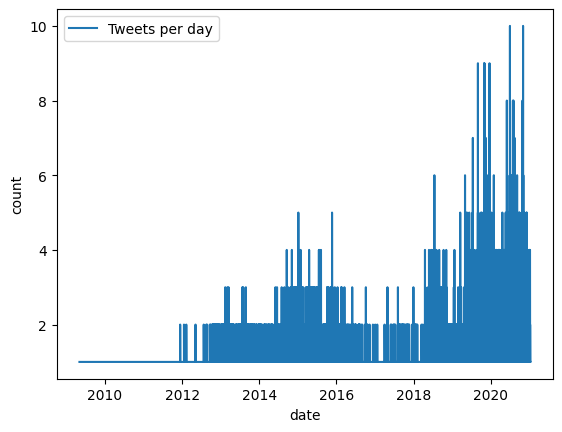

In [80]:
trump['date'] = pd.to_datetime(trump['date'])
tweets_per_day = trump['date'].value_counts().sort_index()
sns.lineplot(data=tweets_per_day, label='Tweets per day')

<Axes: xlabel='date', ylabel='count'>

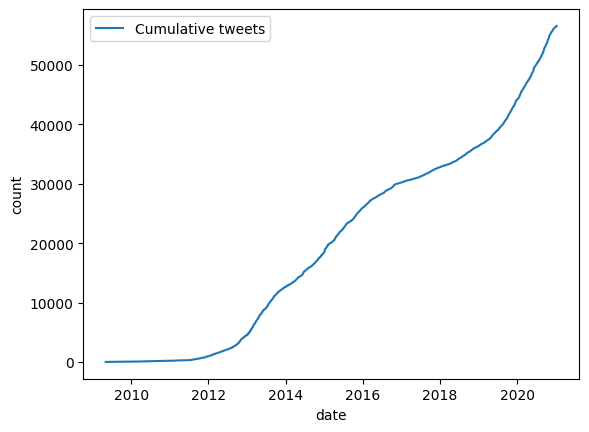

In [81]:
sum_tweets_per_day = tweets_per_day.cumsum()
sns.lineplot(data=sum_tweets_per_day, label='Cumulative tweets')

<Axes: xlabel='date', ylabel='favorites'>

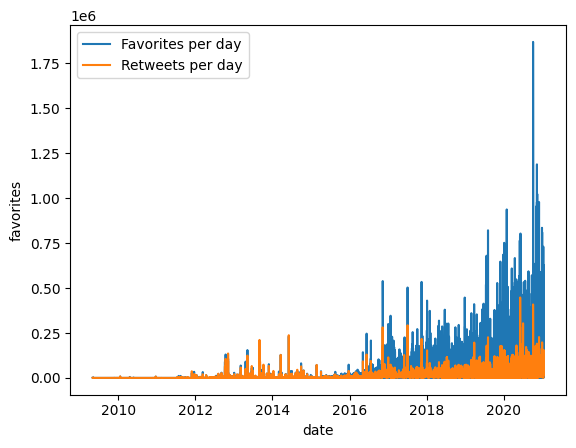

In [82]:
favorites_per_day = trump.groupby('date')['favorites'].sum()
retweets_per_day = trump.groupby('date')['retweets'].sum()
sns.lineplot(data=favorites_per_day, label='Favorites per day')
sns.lineplot(data=retweets_per_day, label='Retweets per day')

<Axes: xlabel='date', ylabel='favorites'>

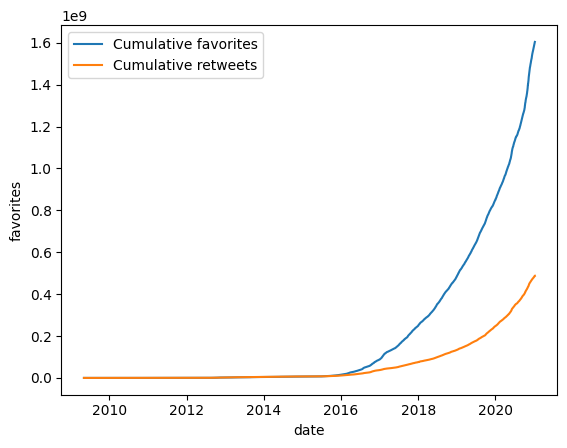

In [83]:
cum_favorites_per_day = favorites_per_day.cumsum()
cum_retweets_per_day = retweets_per_day.cumsum()
sns.lineplot(data=cum_favorites_per_day, label='Cumulative favorites')
sns.lineplot(data=cum_retweets_per_day, label='Cumulative retweets')

In [84]:
def get_polarity(text):
    return TextBlob(text).sentiment.polarity

vectorized_get_polarity = np.vectorize(get_polarity)

trump['polarity'] = vectorized_get_polarity(trump['text'])

In [85]:
def get_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

vectorized_get_subjectivity = np.vectorize(get_subjectivity)

trump['subjectivity'] = vectorized_get_subjectivity(trump['text'])

In [86]:
trump.head(10)

,id,text,device,favorites,retweets,date,polarity,subjectivity
13325,1698308935,Be sure to tune in and watch Donald Trump on L...,Twitter Web Client,939,519,2009-05-04 18:54:00,0.175000,0.497222
13324,1701461182,Donald Trump will be appearing on The View tom...,Twitter Web Client,259,34,2009-05-05 01:00:00,0.170455,0.454545
13323,1737479987,Donald Trump reads Top Ten Financial Tips on L...,Twitter Web Client,37,15,2009-05-08 13:38:00,0.121250,0.420000
13322,1741160716,New Blog Post: Celebrity Apprentice Finale and...,Twitter Web Client,29,11,2009-05-08 20:40:00,0.136364,0.454545
13321,1773561338,"""""""My persona will never be that of a wallflow...",Twitter Web Client,1877,1321,2009-05-12 14:07:00,0.000000,0.000000
13320,1776419923,"""Miss USA Tara Conner will not be fired - """"I'...",Twitter Web Client,25,26,2009-05-12 19:21:00,0.000000,0.000000
13319,1786560616,Listen to an interview with Donald Trump discu...,Twitter Web Client,17,16,2009-05-13 17:38:00,0.136364,0.454545
13318,1796477499,"""""""Strive for wholeness and keep your sense of...",Twitter Web Client,26,17,2009-05-14 16:30:00,0.000000,0.000000
13317,1806258917,"""Enter the """"Think Like A Champion"""" signed bo...",Twitter Web Client,33,18,2009-05-15 14:13:00,0.000000,0.000000
13316,1820624395,"""""""When the achiever achieves, it's not a plat...",Twitter Web Client,46,19,2009-05-16 22:22:00,0.000000,0.000000


In [87]:
trump['polarityBinned'] = pd.cut(trump['polarity'], bins=[-1, -0.6, -0.2, 0.2, 0.6, 1], labels=['highly negative', 'negative', 'neutral', 'positive', 'highly positive'])
trump['subjectivityBinned'] = pd.cut(trump['subjectivity'], bins=[-0.25, 0, 0.25, 0.5, 0.75, 1], labels=['very objective', 'objective', 'neutral', 'subjective', 'highly subjective'])
trump.head(20)

,id,text,device,favorites,retweets,date,polarity,subjectivity,polarityBinned,subjectivityBinned
13325,1698308935,Be sure to tune in and watch Donald Trump on L...,Twitter Web Client,939,519,2009-05-04 18:54:00,0.175000,0.497222,neutral,neutral
13324,1701461182,Donald Trump will be appearing on The View tom...,Twitter Web Client,259,34,2009-05-05 01:00:00,0.170455,0.454545,neutral,neutral
13323,1737479987,Donald Trump reads Top Ten Financial Tips on L...,Twitter Web Client,37,15,2009-05-08 13:38:00,0.121250,0.420000,neutral,neutral
13322,1741160716,New Blog Post: Celebrity Apprentice Finale and...,Twitter Web Client,29,11,2009-05-08 20:40:00,0.136364,0.454545,neutral,neutral
13321,1773561338,"""""""My persona will never be that of a wallflow...",Twitter Web Client,1877,1321,2009-05-12 14:07:00,0.000000,0.000000,neutral,very objective
13320,1776419923,"""Miss USA Tara Conner will not be fired - """"I'...",Twitter Web Client,25,26,2009-05-12 19:21:00,0.000000,0.000000,neutral,very objective
13319,1786560616,Listen to an interview with Donald Trump discu...,Twitter Web Client,17,16,2009-05-13 17:38:00,0.136364,0.454545,neutral,neutral
13318,1796477499,"""""""Strive for wholeness and keep your sense of...",Twitter Web Client,26,17,2009-05-14 16:30:00,0.000000,0.000000,neutral,very objective
13317,1806258917,"""Enter the """"Think Like A Champion"""" signed bo...",Twitter Web Client,33,18,2009-05-15 14:13:00,0.000000,0.000000,neutral,very objective
13316,1820624395,"""""""When the achiever achieves, it's not a plat...",Twitter Web Client,46,19,2009-05-16 22:22:00,0.000000,0.000000,neutral,very objective


polarityBinned
neutral            30709
positive           14303
highly positive     6293
negative            4146
highly negative      864
Name: count, dtype: int64


<Axes: ylabel='count'>

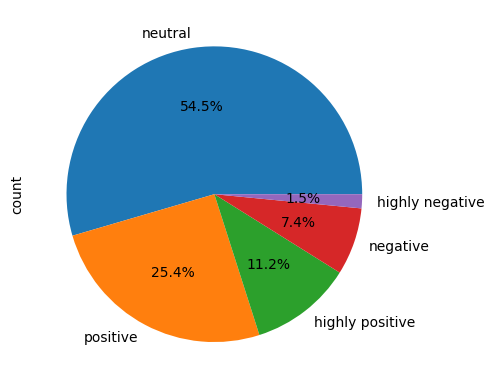

In [88]:
polarity_counts = trump['polarityBinned'].value_counts()
print(trump['polarityBinned'].value_counts())
polarity_counts.plot.pie(autopct='%1.1f%%')

subjectivityBinned
subjective           15568
very objective       14455
neutral              14303
highly subjective     6992
objective             5253
Name: count, dtype: int64


<Axes: ylabel='count'>

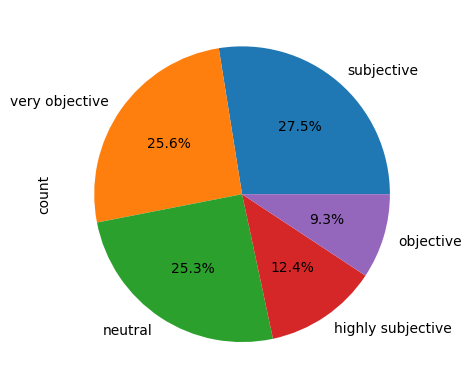

In [89]:
subjectivity_counts = trump['subjectivityBinned'].value_counts()
print(trump['subjectivityBinned'].value_counts())
subjectivity_counts.plot.pie(autopct='%1.1f%%')

In [90]:
negative_tweet = trump[trump['polarityBinned'].isin(['negative', 'highly negative'])]['text']
for tweet in negative_tweet[:10]:
    print("-" + tweet + "\n")

-I am honored to be chosen by Gray Line for their NY Ride of Fame Campaign. Today we had the ribbon cutting ceremony in front of Trump Tower.

-"@johnboehner Message for House GOP  ""The worst thing you can possibly do in a deal is seem desperate to make it."" - The Art of the Deal."

-House GOP wants to cut Medicare, Obama took $500 billion from Medicare for Obamacare. Both Wrong!

-"""China is our enemy--they want to destroy us"" -- Redstate Interview"

-Unfortunately@BarackObama's continued attack on the US $ will lead to ever rising gas prices at the pump and lots of other really bad things

-Obama, sadly, has no business or private sector background---and it shows.

-Fiscal mismanagement of cash costing US Taxpayer billions---cut fraud and waste before cutting funding for Seniors.

-"My interview from yesterday on Fox and Friends -- ""GOP Crazy If  They Don't Get Everything They  Want""  http://bit.ly/nKsBBF"

-"@Johnboehner  ""The worst thing you can possibly do in a deal is seem

In [91]:
def is_only_link(text):
    text = text.strip()
    return text.startswith('http://') or text.startswith('https://') and ' ' not in text

# Remove rows where text is only a link
link_filtered = trump[~trump['text'].apply(is_only_link)]
link_filtered.head(10)

,id,text,device,favorites,retweets,date,polarity,subjectivity,polarityBinned,subjectivityBinned
13325,1698308935,Be sure to tune in and watch Donald Trump on L...,Twitter Web Client,939,519,2009-05-04 18:54:00,0.175000,0.497222,neutral,neutral
13324,1701461182,Donald Trump will be appearing on The View tom...,Twitter Web Client,259,34,2009-05-05 01:00:00,0.170455,0.454545,neutral,neutral
13323,1737479987,Donald Trump reads Top Ten Financial Tips on L...,Twitter Web Client,37,15,2009-05-08 13:38:00,0.121250,0.420000,neutral,neutral
13322,1741160716,New Blog Post: Celebrity Apprentice Finale and...,Twitter Web Client,29,11,2009-05-08 20:40:00,0.136364,0.454545,neutral,neutral
13321,1773561338,"""""""My persona will never be that of a wallflow...",Twitter Web Client,1877,1321,2009-05-12 14:07:00,0.000000,0.000000,neutral,very objective
13320,1776419923,"""Miss USA Tara Conner will not be fired - """"I'...",Twitter Web Client,25,26,2009-05-12 19:21:00,0.000000,0.000000,neutral,very objective
13319,1786560616,Listen to an interview with Donald Trump discu...,Twitter Web Client,17,16,2009-05-13 17:38:00,0.136364,0.454545,neutral,neutral
13318,1796477499,"""""""Strive for wholeness and keep your sense of...",Twitter Web Client,26,17,2009-05-14 16:30:00,0.000000,0.000000,neutral,very objective
13317,1806258917,"""Enter the """"Think Like A Champion"""" signed bo...",Twitter Web Client,33,18,2009-05-15 14:13:00,0.000000,0.000000,neutral,very objective
13316,1820624395,"""""""When the achiever achieves, it's not a plat...",Twitter Web Client,46,19,2009-05-16 22:22:00,0.000000,0.000000,neutral,very objective


polarityBinned
neutral            29466
positive           14303
highly positive     6293
negative            4146
highly negative      864
Name: count, dtype: int64


<Axes: ylabel='count'>

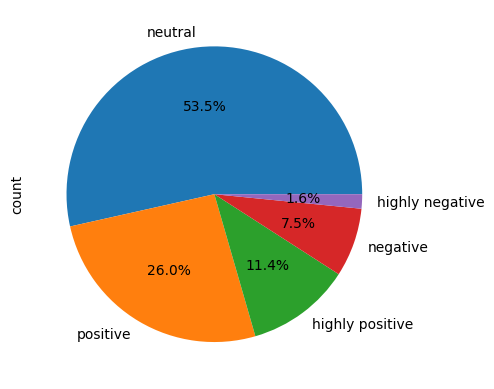

In [92]:
polarity_counts = link_filtered['polarityBinned'].value_counts()
print(link_filtered['polarityBinned'].value_counts())
polarity_counts.plot.pie(autopct='%1.1f%%')

subjectivityBinned
subjective           15568
neutral              14302
very objective       13213
highly subjective     6992
objective             5253
Name: count, dtype: int64


<Axes: ylabel='count'>

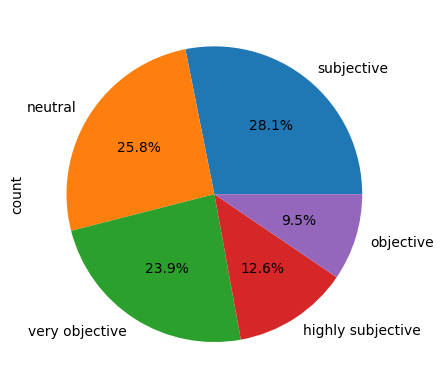

In [93]:
subjectivity_counts = link_filtered['subjectivityBinned'].value_counts()
print(link_filtered['subjectivityBinned'].value_counts())
subjectivity_counts.plot.pie(autopct='%1.1f%%')

In [94]:
# Remove rows where text is a retweet
retweet_filtered = link_filtered[~link_filtered['text'].str.startswith('RT')]
retweet_filtered.head(10)

,id,text,device,favorites,retweets,date,polarity,subjectivity,polarityBinned,subjectivityBinned
13325,1698308935,Be sure to tune in and watch Donald Trump on L...,Twitter Web Client,939,519,2009-05-04 18:54:00,0.175000,0.497222,neutral,neutral
13324,1701461182,Donald Trump will be appearing on The View tom...,Twitter Web Client,259,34,2009-05-05 01:00:00,0.170455,0.454545,neutral,neutral
13323,1737479987,Donald Trump reads Top Ten Financial Tips on L...,Twitter Web Client,37,15,2009-05-08 13:38:00,0.121250,0.420000,neutral,neutral
13322,1741160716,New Blog Post: Celebrity Apprentice Finale and...,Twitter Web Client,29,11,2009-05-08 20:40:00,0.136364,0.454545,neutral,neutral
13321,1773561338,"""""""My persona will never be that of a wallflow...",Twitter Web Client,1877,1321,2009-05-12 14:07:00,0.000000,0.000000,neutral,very objective
13320,1776419923,"""Miss USA Tara Conner will not be fired - """"I'...",Twitter Web Client,25,26,2009-05-12 19:21:00,0.000000,0.000000,neutral,very objective
13319,1786560616,Listen to an interview with Donald Trump discu...,Twitter Web Client,17,16,2009-05-13 17:38:00,0.136364,0.454545,neutral,neutral
13318,1796477499,"""""""Strive for wholeness and keep your sense of...",Twitter Web Client,26,17,2009-05-14 16:30:00,0.000000,0.000000,neutral,very objective
13317,1806258917,"""Enter the """"Think Like A Champion"""" signed bo...",Twitter Web Client,33,18,2009-05-15 14:13:00,0.000000,0.000000,neutral,very objective
13316,1820624395,"""""""When the achiever achieves, it's not a plat...",Twitter Web Client,46,19,2009-05-16 22:22:00,0.000000,0.000000,neutral,very objective


polarityBinned
neutral            23055
positive           12450
highly positive     5746
negative            3429
highly negative      729
Name: count, dtype: int64


<Axes: ylabel='count'>

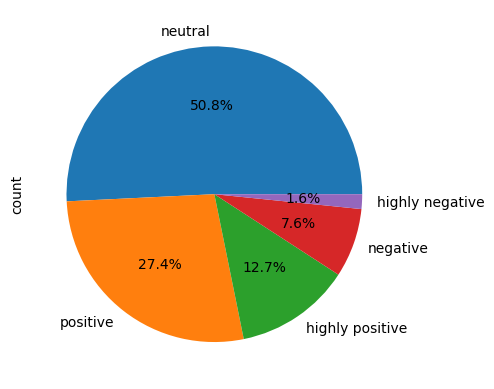

In [95]:
polarity_counts = retweet_filtered['polarityBinned'].value_counts()
print(retweet_filtered['polarityBinned'].value_counts())
polarity_counts.plot.pie(autopct='%1.1f%%')

subjectivityBinned
subjective           15568
neutral              14302
very objective       13213
highly subjective     6992
objective             5253
Name: count, dtype: int64


<Axes: ylabel='count'>

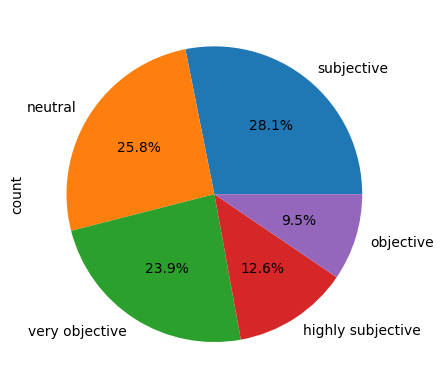

In [96]:
subjectivity_counts = link_filtered['subjectivityBinned'].value_counts()
print(link_filtered['subjectivityBinned'].value_counts())
subjectivity_counts.plot.pie(autopct='%1.1f%%')

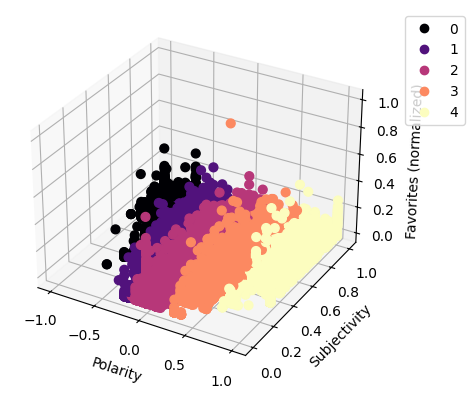

In [97]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
cmap = ListedColormap(sns.color_palette("magma", 256).as_hex())
sc = ax.scatter(retweet_filtered["polarity"], retweet_filtered["subjectivity"], retweet_filtered["favorites"] / retweet_filtered["favorites"].abs().max() , s=40, c=pd.cut(retweet_filtered['polarity'], bins=5, labels=False), marker='o', cmap=cmap, alpha=1)
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

ax.set_xlabel('Polarity')
ax.set_ylabel('Subjectivity')
ax.set_zlabel('Favorites (normalized)')

plt.show()

In [109]:
polarity_mapping = {'highly negative': -1, 'negative': -0.5, 'neutral': 0, 'positive': 0.5, 'highly positive': 1}
trump['polarityNumerical'] = trump['polarityBinned'].map(polarity_mapping)
trump['polarityNumerical'] = pd.to_numeric(trump['polarityNumerical'])

In [111]:
trump['polarityCumulative'] = trump['polarityNumerical'].cumsum()
df = trump[['date', 'polarityCumulative']]
df.dropna(inplace=True)

C:\Users\hailea\AppData\Local\Temp\ipykernel_25044\79262815.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


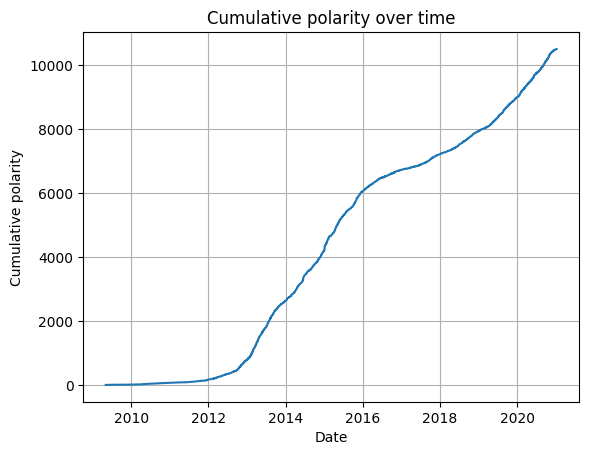

In [112]:
fig, ax = plt.subplots()
ax.plot(df['date'], df['polarityCumulative'])
ax.set(xlabel='Date', ylabel='Cumulative polarity',
       title='Cumulative polarity over time')
ax.grid()
plt.show()

C:\Users\hailea\AppData\Local\Temp\ipykernel_25044\444007410.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retweet_filtered['textNoLinks'] = retweet_filtered['text'].apply(remove_links)


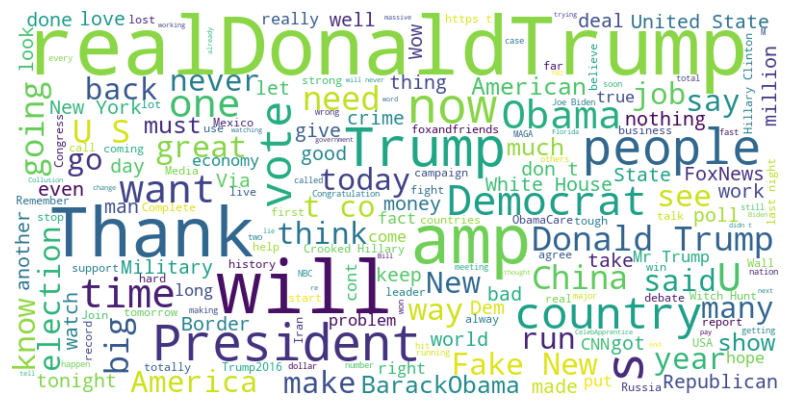

In [128]:
# Remove all links and create a word cloud
def remove_links(text):
    return ' '.join([word for word in text.split() if not is_only_link(word)])

retweet_filtered['textNoLinks'] = retweet_filtered['text'].apply(remove_links)
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(' '.join(retweet_filtered[retweet_filtered['polarityBinned'].isin(['neutral'])]['textNoLinks']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()